## Mini PJT

- 해당 데이터를 고객 단위로 묶어야 합니다.


- 데이터를 정제해서, 월별/고객별로 재정렬이 필요합니다. (aggregation)


- row가 고객별 데이터로 묶이고 난 다음, 고객들을 유형별로 나눠봅니다.


- 여러 가지 클러스터링 알고리즘을 사용하여, 결과를 테스트해봅니다.


- 클러스터링을 위한 전처리부터, 평가까지 모든 항목을 하나하나 살펴보면서 데이터를 뜯어봅니다.

### Data Description

Source : https://www.kaggle.com/c/instacart-market-basket-analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 불러오기 

In [2]:
# instacart 데이터를 모두 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aisles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/departments.csv')
prior = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/order_products__prior.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/order_products__train.csv')
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠 머신러닝 실습/products.csv')

In [4]:
print(aisles.shape, departments.shape, prior.shape, train.shape, orders.shape, products.shape)

(134, 2) (21, 2) (32434489, 4) (1384617, 4) (3421083, 7) (49688, 4)


In [20]:
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16
4,40,382,prior,29,1,15,23.0,42450,2,1,Macaroni & Cheese,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,628,204912,prior,24,4,7,4.0,6532,4,1,Organic YoKids Very Berry Smoothies,120,16
9996,684,205709,prior,36,0,8,7.0,17923,5,1,Crinkle Cut Fries,129,1
9997,684,205709,prior,36,0,8,7.0,32115,8,0,93/7 Ground Beef,6,2
9998,3,205970,prior,16,5,17,12.0,17668,5,1,Unsweetened Chocolate Almond Breeze Almond Milk,91,16


In [11]:
prior_sample = prior[:10000]

In [22]:
# 불러온 모든 테이블을 합칩니다.
temp = pd.merge(orders, prior_sample, on = 'order_id')
temp = pd.merge(temp, products, on = 'product_id')
temp = pd.merge(temp, departments, on = 'department_id')
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk
9998,75,106387,prior,1,5,19,NaN,10915,3,0,Organic Short Brown Sprouted Rice,68,10,bulk


### 2. EDA

In [30]:
# 10만개의 거래내역에 대해서 각 물품을 얼마나 샀을까?
# temp.user_id.value_counts() # 972명의 고객
#temp.product_name.value_counts() 
# temp.aisle.value_counts()
# temp.department.value_counts()
# temp.order_dow.value_counts()

### 3. 데이터 전처리

- 데이터를 transaction 단위로 변경합니다.

- 각자의 방법대로 데이터의 단위를 정해봅시다.


> User 단위로 어떤 물품을 구매했는지의 정보만 가지는 feature vector로 변환한다. e.g. pd.crosstab, CountVectorizer

In [33]:
# transaction 단위로 변경하고, User당 정보로 변환하는 과정까지 마무리합니다.
# 1. department
# 2. aisle
# 3. product name
x =pd.crosstab(temp.user_id, columns = temp.department)
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### 4. 클러스터링 모델 적용하기

- 사용하는 클러스터링 모델은 KMeans로 합니다.

(원하시면 AgglomerativeClustering, DBSCAN, SpectralClustering을 사용해보셔도 됩니다. 단, 시간이 매우매우 오래 걸릴수 있으니 주의하세요..)

**[K-Means]**

- Elbow method를 이용하여 최적의 K값을 찾아보세요.


- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?


- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.

In [34]:
# data setting
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# tSNE : 시각화용도의 차원감소 기법. (2차원으로 변환해주는 기법)
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
tsne_data = tsne.fit_transform(x)
tsne_data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 26.580658 ,  -0.0454515],
       [ 12.319101 , -23.20197  ],
       [ 16.817667 ,  18.113459 ],
       ...,
       [  5.0122027,  12.573147 ],
       [ 21.690586 ,  -3.5500352],
       [-12.226356 ,   7.483381 ]], dtype=float32)

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c='y')
plt.show()

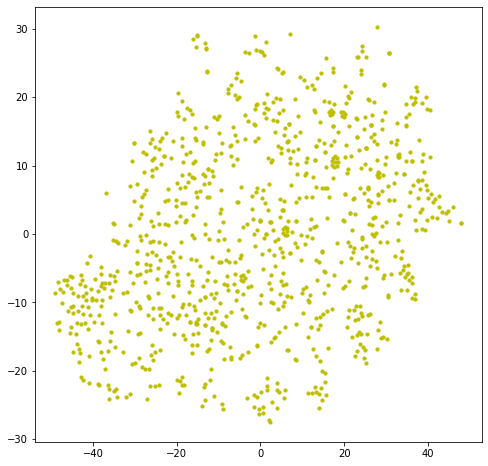

In [38]:
# 2차원 분포
plt.figure(figsize = (8,8))
plt.scatter(tsne_data[:,0], tsne_data[:, 1], s= 10, c = 'y')
plt.show()

In [60]:
# K-means를 돌려봅시다.
from sklearn.cluster import KMeans                  # 1. k-means
from sklearn.cluster import AgglomerativeClustering # 2. Hierarchical Agglomerative
from sklearn.cluster import DBSCAN                  # 3. DBSCAN
from sklearn.cluster import SpectralClustering      # 4. Spectral Clustering 

from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4)
model22 = KMeans(n_clusters = 2)
# unsupervised setting
pred = model.fit_predict(x)
pred2 = model2.fit_predict(x)

print('Silhouette Score : %.4f' % silhouette_score(x, pred))
print('Silhouette Score : %.4f' % silhouette_score(x, pred2))

Silhouette Score : 0.1915
Silhouette Score : 0.3641


In [59]:
# elbow method
sse = []
silhouettes = []

for k in range(2,11):
  model = KMeans(n_clusters = k) # k : 2 ~ 10
  model2 = KMeans(n_clusters = k)
  pred = model.fit_predict(x)
  sse.append(model.inertia_) # SSE
  silhouettes.append(silhouette_score(x, pred))

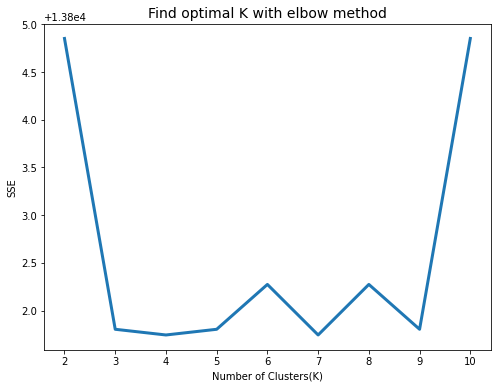

In [61]:
# 최적의 K는 어떻게 구할까요?
# Elbow method : 정해진 K에 대해서 SSE를 계산한 다음, SSE가 가장 많이 꺾이는 K(elbow)가 optimal K라고 판단하는 방법.

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with elbow method", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("SSE", fontsize=10)
plt.plot(range(2, 11), sse, lw = 3)
plt.show()

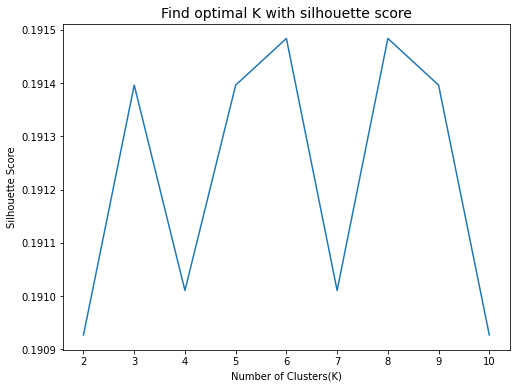

In [62]:
# Silhouette score : 같은 클러스터에 속하는 데이터중 가장 먼 데이터와의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표. [-1, 1]
# Reference : https://en.wikipedia.org/wiki/Silhouette_(clustering)

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with silhouette score", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.plot(range(2, 11), silhouettes)
plt.show()

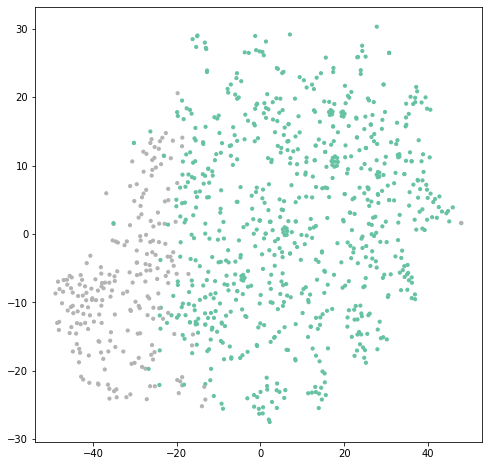

In [67]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c = pred2, cmap="Set2")
plt.show()

In [68]:
# see summary
x["cluster_label"] = pred2
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,1,0,0,1,0,0,2,0,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,1,2,0,0,2,0,0,8,2,1
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,4,1,0
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
group1 = x.loc[x.cluster_label == 0, :]
group2 = x.loc[x.cluster_label == 1, :]
print(group1.shape, group2.shape)

(750, 22) (222, 22)


In [84]:
group1.mean()

department
alcohol            0.033333
babies             0.105333
bakery             0.297333
beverages          0.776000
breakfast          0.201333
bulk               0.002667
canned goods       0.282667
dairy eggs         1.273333
deli               0.241333
dry goods pasta    0.202667
frozen             0.653333
household          0.252000
international      0.073333
meat seafood       0.166667
missing            0.014667
other              0.016000
pantry             0.512000
personal care      0.129333
pets               0.026667
produce            1.668000
snacks             0.728000
cluster_label      0.000000
dtype: float64

In [85]:
group2.mean()

department
alcohol            0.009009
babies             0.234234
bakery             0.590090
beverages          0.986486
breakfast          0.391892
bulk               0.018018
canned goods       0.675676
dairy eggs         3.117117
deli               0.621622
dry goods pasta    0.463964
frozen             1.153153
household          0.270270
international      0.139640
meat seafood       0.450450
missing            0.018018
other              0.004505
pantry             0.963964
personal care      0.126126
pets               0.036036
produce            7.486486
snacks             1.423423
cluster_label      1.000000
dtype: float64